# Graficado de series de tiempo usando Matplotlib y 

## Definición paquetes necesarios

In [29]:
#-*- coding: utf-8 -*-
#!/usr/bin/env python
# ------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt

## Lectura de los datos
Lectura de los datos de precipitación

In [36]:
path_data = '/Users/jsepulveda/Documents/asignaturas/curso_PythonBasico/datos/'
name_data_ppt = 'ppt_dona_maria_2.csv'

data_ppt = pd.read_csv(path_data + name_data_ppt, sep = ',', index_col = 0) 
data_ppt.index = pd.to_datetime(data_ppt.index)

Lectura del archivo xlxs

In [37]:
name_excel  = '3_2017v1.xlsx'
name_sheet1 = "Consolidado"

df_ozono = pd.read_excel(path_data + name_excel,sheet_name=name_sheet1,\
                   usecols=[0,14,34],\
                   skipfooter = 0, index_col=0)

In [38]:
print (data_ppt)

                       ppt
fecha_hora                
2013-01-01 01:00:00  0.000
2013-01-01 02:00:00  0.000
2013-01-01 03:00:00  0.000
2013-01-01 04:00:00  0.000
2013-01-01 05:00:00  0.000
...                    ...
2021-02-28 20:00:00  2.879
2021-02-28 21:00:00  0.450
2021-02-28 22:00:00  0.000
2021-02-28 23:00:00  0.000
2021-03-01 00:00:00  0.000

[71568 rows x 1 columns]


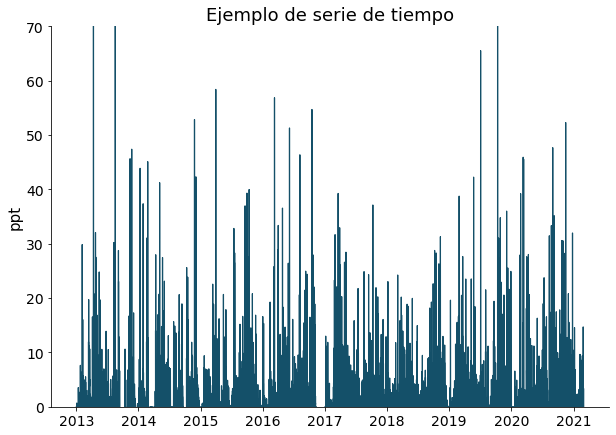

In [39]:
label_size = 12

plt.close()
plt.cla()
plt.clf()
fig1 = plt.figure(1)
fig1.set_figheight(7)
fig1.set_figwidth(10)
#plt.subplots_adjust(left = 0.15 ,right = 0.8,top = 0.95,\
#                    bottom = 0.08,\
#                    hspace = 0.37, wspace = 0.3)

ax = fig1.add_subplot(1,1,1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_title('Ejemplo de serie de tiempo',\
             fontsize = label_size+6)
ax.set_ylabel('ppt', fontsize = label_size+3)
ax.set_xlabel('tiempo', fontsize = label_size+3)
ax.tick_params(axis='x', which = 'both', top = False,\
               labelsize= label_size+2)
ax.tick_params(axis='y', which = 'both', right = False,\
               labelsize= label_size+2)
ax.set_ylim(0, 70.)
ax.set_xlim(.datetime(2021,5,23,7,0), data_ppt['ppt'].values)
#ax.set_xlim(np.amin(date_num), np.amax(date_num))
img = ax.plot(data_ppt.index,\
              data_ppt['ppt'].values,\
              lw = 1.2, c = (20/255.,80/255.,105/255.))
date_format = md.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

#plt.savefig('test_serie.pdf', format = 'pdf', dpi = 250)
plt.show()

# Transformada de Fourier en python

In [52]:
import math
import random

In [53]:
time_step = 0.005
t = np.arange(0,10,time_step)
fun = np.sin(2*np.pi*t) + np.sin(2*2*np.pi*t)\
    + np.sin(4*2*np.pi*t)

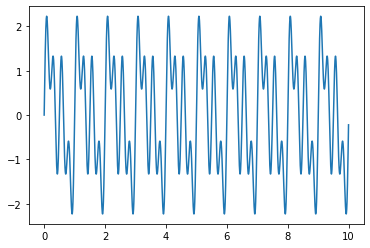

In [54]:
# Se pinta la función o la serie de tiempo
plt.cla()
plt.clf()
plt.close()
plt.plot(t, fun)

plt.show()

In [47]:
def myfft(serie, time_step):
    size_f = len(serie)   
    fourier = np.fft.fft(serie)
    power_spec = np.abs(fourier) ** 2.0
    amp = np.abs(fourier)
    freq = np.fft.fftfreq(size_f, time_step)
    period = 1./freq   
    return fourier, power_spec, amp, freq, period

In [55]:
fourier,power_spec,amp,freq,period = myfft(fun, time_step)

<ipython-input-47-8915982c9319>:7: RuntimeWarning: divide by zero encountered in true_divide
  period = 1./freq


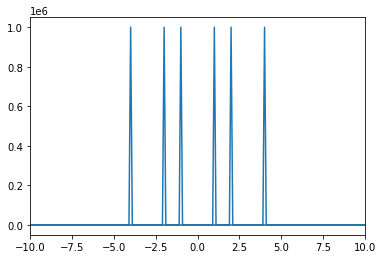

In [56]:
plt.close()
plt.cla()
plt.clf()
plt.xlim(-10.,10.)
plt.plot(freq, power_spec)
plt.show()

In [57]:
# Se encuentra la amplitud para los positivos
amp_n    = amp/len(fun)
amp_pos  = amp_n[1:len(fun)//2] * 2.
var_fun  = np.var(fun)
var_exp  = (amp_pos/np.sum(amp_pos))*var_fun
porc_var = (amp_pos/np.sum(amp_pos))

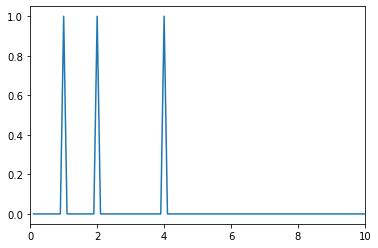

In [58]:
plt.cla()
plt.clf()
plt.close()
plt.plot(freq[1:len(fun)//2],amp_pos)
plt.xlim(0, 10.)
plt.show()

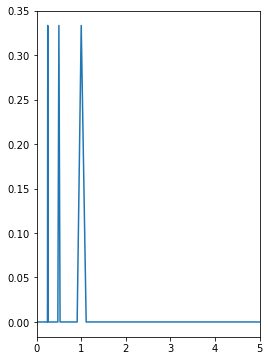

In [60]:
# Se grafica el porcentaje de la varianza explicada
plt.cla()
plt.clf()
plt.close()
fig1 = plt.figure(1)
fig1.set_figheight(6)
fig1.set_figwidth(4)
ax1 = fig1.add_subplot(1,1,1)
ax1.set_xlim(0.,5)
ax1.plot(period[1:len(fun)//2], porc_var) 
plt.show()

In [62]:
freq_filt = np.copy(freq)
fourier_filt1 = np.copy(fourier)
fourier_filt2 = np.copy(fourier)
fourier_filt3 = np.copy(fourier)
pos1 = np.where((np.abs(freq) <= 1.) | (np.abs(freq) >= 4.))
pos2 = np.where((np.abs(freq) < 4.))
pos3 = np.where((np.abs(freq) > 1.))
fourier_filt1[pos1] = 0.
fourier_filt2[pos2] = 0.
fourier_filt3[pos3] = 0.
inv1 = np.fft.ifft(fourier_filt1)
inv2 = np.fft.ifft(fourier_filt2)
inv3 = np.fft.ifft(fourier_filt3)

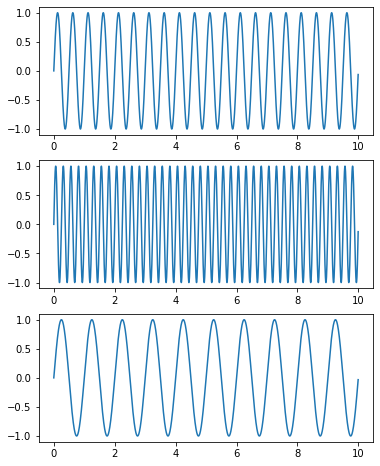

In [63]:
plt.cla()
plt.clf()
plt.close()
fig1 = plt.figure(1)
fig1.set_figheight(8)
fig1.set_figwidth(6)
ax1 = fig1.add_subplot(3,1,1)
ax1.plot(t, np.real(inv1))
ax2 = fig1.add_subplot(3,1,2)
ax2.plot(t, np.real(inv2))
ax3 = fig1.add_subplot(3,1,3)
ax3.plot(t, np.real(inv3))
plt.show()